In [1]:
%tensorflow_version 2.x  # Colab...

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab...`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


CIFAR-100

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# from keras import regularizers
from tensorflow.keras import datasets, layers, models, regularizers

169009152/169001437 [==============================] - 11s 0us/step
[19]


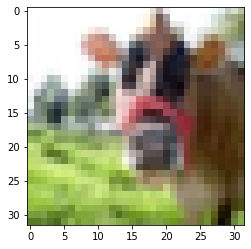

In [3]:
# mnist = tf.keras.datasets.mnist
cifar = tf.keras.datasets.cifar100
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape(train_images.shape[0],32,32,3).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape(test_images.shape[0],32,32,3).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(128)

In [0]:
train_steps = 2500

n_h = 256
#By increasing the number of initial filters, the accuracy of the model increases.previously we were using 16,32,64.so it wasn't
# working well as it has 100 classes.


layer_list = [layers.Conv2D(128, (3, 3), activation='tanh', input_shape=(32, 32, 3)),
              layers.Conv2D(128, (3, 3), activation='tanh'),layers.MaxPool2D(pool_size=(2,2)),
              layers.Conv2D(256, (3, 3), activation='softmax'),layers.MaxPool2D(pool_size=(2,2)),layers.Conv2D(256, (3, 3), activation='tanh'),
              layers.Flatten(),layers.Dense(100)]
model = tf.keras.Sequential(layer_list)

#model.build((None, 784))  # optional -- note None for the batch axis!!

opt = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (img_batch, lbl_batch) in enumerate(data):
    #print(img_batch.shape)
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
        train_acc_metric.reset_states()
    

Loss: 4.603890419006348 Accuracy: 0.015625
Loss: 3.9736382961273193 Accuracy: 0.049140624701976776
Loss: 3.634535789489746 Accuracy: 0.11976562440395355
Loss: 3.3900833129882812 Accuracy: 0.18390625715255737
Loss: 2.8914268016815186 Accuracy: 0.23596298694610596
Loss: 2.925199031829834 Accuracy: 0.2819531261920929
Loss: 3.068211317062378 Accuracy: 0.30757811665534973
Loss: 2.809182643890381 Accuracy: 0.31843748688697815
Loss: 2.5968918800354004 Accuracy: 0.345906525850296
Loss: 2.201401710510254 Accuracy: 0.39695313572883606
Loss: 2.0648529529571533 Accuracy: 0.40312498807907104
Loss: 2.3147964477539062 Accuracy: 0.42070311307907104
Loss: 1.94989013671875 Accuracy: 0.43632370233535767
Loss: 1.8039361238479614 Accuracy: 0.4856249988079071
Loss: 1.7829322814941406 Accuracy: 0.4764062464237213
Loss: 1.9838743209838867 Accuracy: 0.48148438334465027
Loss: 1.4737403392791748 Accuracy: 0.5129391551017761
Loss: 1.5618946552276611 Accuracy: 0.5721094012260437
Loss: 1.8522320985794067 Accuracy: 

In [7]:
# this is very convenient -- before, we usually had code that
# evaluates the whole test set at once -- this won't work for
# large datasets/models. With metrics, we can just iterate
# over the data and the metric takes care of averaging etc.

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.41370001435279846


CIFAR-10
Above architecture suits better the CIFAR-10 datasets

170500096/170498071 [==============================] - 130s 1us/step
[6]


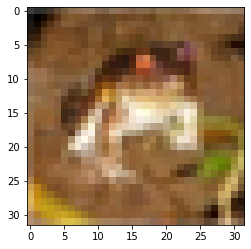

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# from keras import regularizers
from tensorflow.keras import datasets, layers, models, regularizers

# mnist = tf.keras.datasets.mnist
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape(train_images.shape[0],32,32,3).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape(test_images.shape[0],32,32,3).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(128)

train_steps = 2500

n_h = 256
#By increasing the number of initial filters, the accuracy of the model increases.previously we were using 16,32,64.so it wasn't
# working well as it has 100 classes.


layer_list = [layers.Conv2D(128, (3, 3), activation='tanh', input_shape=(32, 32, 3)),
              layers.Conv2D(128, (3, 3), activation='tanh'),layers.MaxPool2D(pool_size=(2,2)),
              layers.Conv2D(256, (3, 3), activation='softmax'),layers.MaxPool2D(pool_size=(2,2)),layers.Conv2D(256, (3, 3), activation='tanh'),
              layers.Flatten(),layers.Dense(10)]
model = tf.keras.Sequential(layer_list)

#model.build((None, 784))  # optional -- note None for the batch axis!!

opt = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [15]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (img_batch, lbl_batch) in enumerate(data):
    #print(img_batch.shape)
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
        print('Seen so far: %s samples' % ((step + 1) * 64))
        train_acc_metric.reset_states()
    

Loss: 0.347211629152298 Accuracy: 0.8984375
Seen so far: 64 samples
Loss: 0.4170062839984894 Accuracy: 0.8757030963897705
Seen so far: 6464 samples
Loss: 0.3926665484905243 Accuracy: 0.8570312261581421
Seen so far: 12864 samples
Loss: 0.5470508337020874 Accuracy: 0.8528906106948853
Seen so far: 19264 samples
Loss: 0.27061280608177185 Accuracy: 0.8404955863952637
Seen so far: 25664 samples
Loss: 0.31687691807746887 Accuracy: 0.9056249856948853
Seen so far: 32064 samples
Loss: 0.28986796736717224 Accuracy: 0.8824999928474426
Seen so far: 38464 samples
Loss: 0.42424070835113525 Accuracy: 0.8760156035423279
Seen so far: 44864 samples
Loss: 0.2051643431186676 Accuracy: 0.8774309754371643
Seen so far: 51264 samples
Loss: 0.20159560441970825 Accuracy: 0.9272656440734863
Seen so far: 57664 samples
Loss: 0.2820422649383545 Accuracy: 0.9185937643051147
Seen so far: 64064 samples
Loss: 0.2785566449165344 Accuracy: 0.900390625
Seen so far: 70464 samples
Loss: 0.12065964937210083 Accuracy: 0.906759

In [16]:

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.7161999940872192
